In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer

from sklearn.linear_model import LogisticRegression, Lasso, Ridge, ElasticNet

from sklearn.datasets import load_iris


In [34]:
iris_data = load_iris(as_frame=True).frame

In [35]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [36]:
iris_data.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


In [37]:
# C = 1e12 # very small regularization means no regularization
# lasso = Lasso(alpha=1/C)

In [38]:
iris_data.shape

(150, 5)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.drop(columns=['target']), iris_data.target, test_size=0.2, random_state=42)

In [40]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

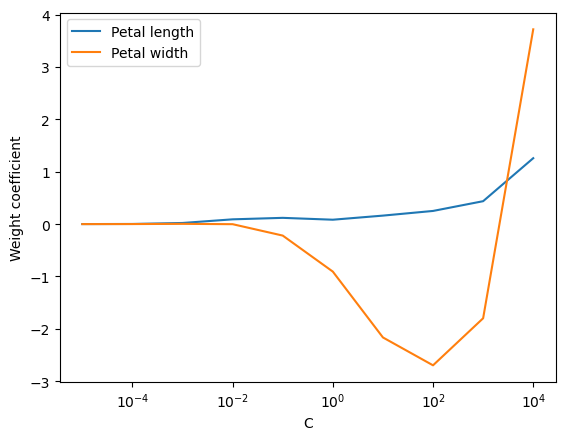

In [41]:
iris = load_iris()
attributes, labels = iris.data[:, [2, 3]], iris.target
weights, params = [], []
for c in np.arange(-5, 5):
    model = LogisticRegression(C = 10.0 ** c)
    model.fit(attributes, labels)
    weights.append(model.coef_[1]) # Display only the second class
    params.append(10.0 ** c)
weights = np.array(weights)
plt.plot(params, weights[:, 0], label = "Petal length")
plt.plot(params, weights[:, 1], label = "Petal width")
plt.xlabel("C")
plt.ylabel("Weight coefficient")
plt.xscale("log")
plt.legend()
plt.show()